In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.metrics as metrics
from sklearn import svm
from sklearn.preprocessing import StandardScaler

In [2]:
dataframe_train_test =  pd.read_csv('/content/drive/MyDrive/smith_datasets/sEmg_fatigue/time_freq_250ms_window_emg_fatigue_dataframe_train_test_SMITH.csv')

In [3]:
dataframe_train_test.columns

Index(['fMAV_R BICEPS BRACHII: EMG 1 [V]', 'fZC_R BICEPS BRACHII: EMG 1 [V]',
       'fWL_R BICEPS BRACHII: EMG 1 [V]', 'fSSC_R BICEPS BRACHII: EMG 1 [V]',
       'fRMS_R BICEPS BRACHII: EMG 1 [V]', 'fIEMG_R BICEPS BRACHII: EMG 1 [V]',
       'fVAR_R BICEPS BRACHII: EMG 1 [V]', 'fMF_R BICEPS BRACHII: EMG 1 [V]',
       'fMPF_R BICEPS BRACHII: EMG 1 [V]',
       'fSpectralEntropy_R BICEPS BRACHII: EMG 1 [V]',
       'fMAV_R DELTOID ANTERIOR: EMG 2 [V]',
       'fZC_R DELTOID ANTERIOR: EMG 2 [V]',
       'fWL_R DELTOID ANTERIOR: EMG 2 [V]',
       'fSSC_R DELTOID ANTERIOR: EMG 2 [V]',
       'fRMS_R DELTOID ANTERIOR: EMG 2 [V]',
       'fIEMG_R DELTOID ANTERIOR: EMG 2 [V]',
       'fVAR_R DELTOID ANTERIOR: EMG 2 [V]',
       'fMF_R DELTOID ANTERIOR: EMG 2 [V]',
       'fMPF_R DELTOID ANTERIOR: EMG 2 [V]',
       'fSpectralEntropy_R DELTOID ANTERIOR: EMG 2 [V]',
       'fMAV_R DELTOID MEDIUS: EMG 6 [V]', 'fZC_R DELTOID MEDIUS: EMG 6 [V]',
       'fWL_R DELTOID MEDIUS: EMG 6 [V]', 'fSSC_R 

The below block of code trains a SVM model with rbf kernal on a non-fatigue test set computes the Accuracy, F1 Score, Recall and spits out the drop from test on non-fatigue to fatigue for each feature from the feature set

In [4]:
print("Trained ON NON-FATIGUED DATA")
print("---------------------------")

feat_arr = ['fMAV', 'fZC', 'fWL', 'fSSC', 'fRMS', 'fIEMG', 'fVAR','fMF', 'fMPF','fSpectralEntropy']

for feat in feat_arr:

  keywords = [feat,'FATIGUE_LEVEL','SUBJECT','GESTURE']
  pattern_keywords = '|'.join(keywords)

  df_features = dataframe_train_test.filter(regex=pattern_keywords, axis=1)



  # TRAIN ON NON-FATIGUED DATA
  non_fatigue_df = df_features[df_features['FATIGUE_LEVEL'] == 0]
  train_df = non_fatigue_df.sample(frac=0.8, random_state=42)
  train_df = train_df.drop(columns=['FATIGUE_LEVEL', 'SUBJECT'], axis=1)

  X_train = train_df.drop(columns=['GESTURE'], axis=1)
  Y_train = train_df['GESTURE']


  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)

  svm_model = svm.SVC(kernel='rbf', C=1, gamma='scale')
  svm_model.fit(X_train_scaled, Y_train)







  # TESTED ON NON-FATIGUED DATA
  test_df = non_fatigue_df.drop(train_df.index)
  test_df = test_df.drop(columns=['FATIGUE_LEVEL', 'SUBJECT'], axis=1)

  X_test = test_df.drop(columns=['GESTURE'], axis=1)
  Y_test = test_df['GESTURE']

  X_test_scaled = scaler.transform(X_test)
  svm_model_preds = svm_model.predict(X_test_scaled)



  accuracy_non_fatigued_test = metrics.accuracy_score(Y_test, svm_model_preds) *100
  recall_non_fatigued_test = metrics.recall_score(Y_test, svm_model_preds, average='weighted') *100
  f1_non_fatigued_test = metrics.f1_score(Y_test, svm_model_preds, average='weighted') *100


  # TESTED ON FATIGUED DATA

  fatigue_df = df_features[(df_features['FATIGUE_LEVEL'] == 1) | (df_features['FATIGUE_LEVEL'] == 2)]
  # fatigue_df = df_features[df_features['FATIGUE_LEVEL'] == 2]
  test_df = fatigue_df.drop(columns=['FATIGUE_LEVEL', 'SUBJECT'], axis=1)

  X_test = test_df.drop(columns=['GESTURE'], axis=1)
  Y_test = test_df['GESTURE']

  X_test_scaled = scaler.transform(X_test)
  svm_model_preds = svm_model.predict(X_test_scaled)

  accuracy_fatigued_test = metrics.accuracy_score(Y_test, svm_model_preds) *100
  recall_fatigued_test = metrics.recall_score(Y_test, svm_model_preds, average='weighted') *100
  f1_fatigued_test = metrics.f1_score(Y_test, svm_model_preds, average='weighted') *100


  print(feat)
  print(f"Accuracy Drop:{accuracy_fatigued_test:.2f} - {accuracy_non_fatigued_test:.2f} = {accuracy_fatigued_test - accuracy_non_fatigued_test}")
  print(f"Weighted Recall Drop:{recall_fatigued_test:.2f} - {recall_non_fatigued_test:.2f} = {recall_fatigued_test - recall_non_fatigued_test}")
  print(f"Weighted F1 Score Drop:{f1_fatigued_test:.2f} - {f1_non_fatigued_test:.2f} = {f1_fatigued_test - f1_non_fatigued_test}")
  print("---------------------------")


Trained ON NON-FATIGUED DATA
---------------------------
fMAV
Accuracy Drop:88.84 - 92.54 = -3.6984810309002683
Weighted Recall Drop:88.84 - 92.54 = -3.6984810309002683
Weighted F1 Score Drop:88.87 - 92.46 = -3.5981609629201188
---------------------------
fZC
Accuracy Drop:84.77 - 89.81 = -5.0426989272981615
Weighted Recall Drop:84.77 - 89.81 = -5.0426989272981615
Weighted F1 Score Drop:85.00 - 89.82 = -4.820783111474512
---------------------------
fWL
Accuracy Drop:87.62 - 91.92 = -4.300573745988643
Weighted Recall Drop:87.62 - 91.92 = -4.300573745988643
Weighted F1 Score Drop:87.66 - 91.85 = -4.191595237337182
---------------------------
fSSC
Accuracy Drop:81.95 - 90.61 = -8.666951583659838
Weighted Recall Drop:81.95 - 90.61 = -8.666951583659838
Weighted F1 Score Drop:82.24 - 90.59 = -8.345585836154228
---------------------------
fRMS
Accuracy Drop:89.43 - 93.09 = -3.655678923692406
Weighted Recall Drop:89.43 - 93.09 = -3.655678923692406
Weighted F1 Score Drop:89.46 - 93.02 = -3.5654

The below code is the heart of this study. This does the Ablation study and plots all necessary graphs to infer conclusions.

Detected Feature Types:
['fIEMG', 'fMAV', 'fMF', 'fMPF', 'fRMS', 'fSSC', 'fSpectralEntropy', 'fVAR', 'fWL', 'fZC']

===== FEATURE TYPE ABLATION RESULTS =====
       Feature_Type  Num_Features  NonFatigue_Acc  Fatigue_Acc  NonFatigue_F1  \
7              fVAR             4       92.360858    89.600847      92.256494   
4              fRMS             4       93.088396    89.432717      93.023291   
1              fMAV             4       92.542743    88.844262      92.464609   
0             fIEMG             4       92.542743    88.844262      92.464609   
8               fWL             4       91.924336    87.623762      91.849788   
9               fZC             4       89.814478    84.771779      89.824625   
5              fSSC             4       90.614769    81.947817      90.588253   
3              fMPF             4       82.211713    75.334703      82.195693   
2               fMF             4       77.118952    74.095523      76.758269   
6  fSpectralEntropy             

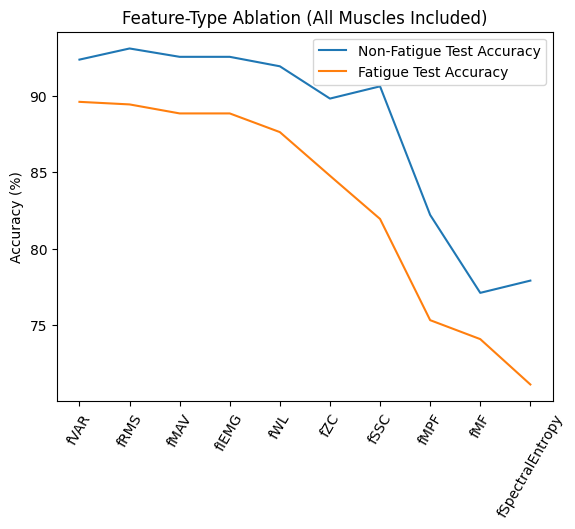

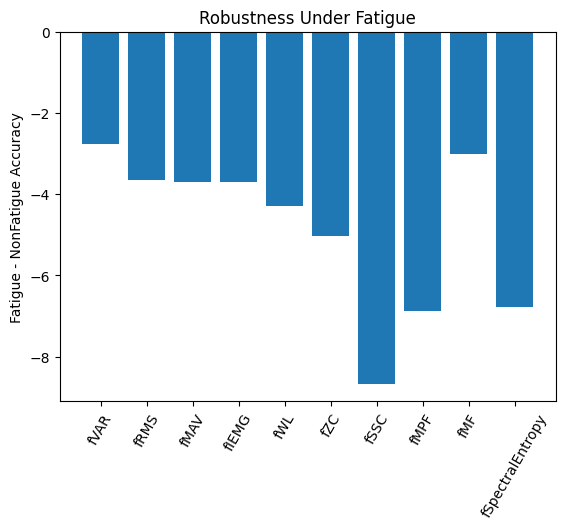

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.preprocessing import StandardScaler

# =========================================
# SETTINGS
# =========================================

meta_cols = ['GESTURE', 'SUBJECT', 'FATIGUE_LEVEL']

# Extract unique feature prefixes automatically
feature_prefixes = sorted(list(set([col.split('_')[0] for col in dataframe_train_test.columns
                                     if col not in meta_cols])))

print("Detected Feature Types:")
print(feature_prefixes)

# =========================================
# FUNCTION TO GET ALL MUSCLE COLUMNS
# =========================================

def get_feature_columns(prefix, df):
    return [col for col in df.columns if col.startswith(prefix + "_")]

# =========================================
# EXPERIMENT FUNCTION
# =========================================

def run_experiment(feature_prefix, df):

    feature_cols = get_feature_columns(feature_prefix, df)

    df_selected = df[feature_cols + meta_cols]

    # Train on NON-FATIGUED
    non_fatigue_df = df_selected[df_selected['FATIGUE_LEVEL'] == 0]
    train_df = non_fatigue_df.sample(frac=0.8, random_state=42)

    X_train = train_df[feature_cols]
    Y_train = train_df['GESTURE']

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    model = svm.SVC(kernel='rbf', C=1, gamma='scale')
    model.fit(X_train_scaled, Y_train)

    # Test on remaining NON-FATIGUED
    test_nf = non_fatigue_df.drop(train_df.index)
    X_test_nf = test_nf[feature_cols]
    Y_test_nf = test_nf['GESTURE']

    X_test_nf_scaled = scaler.transform(X_test_nf)
    preds_nf = model.predict(X_test_nf_scaled)

    acc_nf = metrics.accuracy_score(Y_test_nf, preds_nf) * 100
    f1_nf = metrics.f1_score(Y_test_nf, preds_nf, average='weighted') * 100

    # Test on FATIGUED
    fatigue_df = df_selected[df_selected['FATIGUE_LEVEL'] != 0]
    X_test_f = fatigue_df[feature_cols]
    Y_test_f = fatigue_df['GESTURE']

    X_test_f_scaled = scaler.transform(X_test_f)
    preds_f = model.predict(X_test_f_scaled)

    acc_f = metrics.accuracy_score(Y_test_f, preds_f) * 100
    f1_f = metrics.f1_score(Y_test_f, preds_f, average='weighted') * 100

    drop = acc_f - acc_nf

    return acc_nf, acc_f, f1_nf, f1_f, drop, len(feature_cols)

# =========================================
# RUN FEATURE-TYPE ABLATION
# =========================================

results = []

for prefix in feature_prefixes:

    acc_nf, acc_f, f1_nf, f1_f, drop, num_features = run_experiment(prefix, dataframe_train_test)

    results.append({
        "Feature_Type": prefix,
        "Num_Features": num_features,
        "NonFatigue_Acc": acc_nf,
        "Fatigue_Acc": acc_f,
        "NonFatigue_F1": f1_nf,
        "Fatigue_F1": f1_f,
        "Accuracy_Drop": drop
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Fatigue_Acc", ascending=False)

print("\n===== FEATURE TYPE ABLATION RESULTS =====")
print(results_df)

# =========================================
# BEST FEATURE TYPE
# =========================================

best = results_df.iloc[0]

print("\n===== BEST FEATURE TYPE =====")
print(best)

# =========================================
# PLOTS
# =========================================

# Accuracy Comparison
plt.figure()
plt.plot(results_df["Feature_Type"], results_df["NonFatigue_Acc"], label='Non-Fatigue Test Accuracy')
plt.plot(results_df["Feature_Type"], results_df["Fatigue_Acc"], label='Fatigue Test Accuracy')
plt.xticks(rotation=60)
plt.ylabel("Accuracy (%)")
plt.title("Feature-Type Ablation (All Muscles Included)")
plt.legend()
plt.show()


# Robustness Drop
plt.figure()
plt.bar(results_df["Feature_Type"], results_df["Accuracy_Drop"])
plt.xticks(rotation=60)
plt.ylabel("Fatigue - NonFatigue Accuracy")
plt.title("Robustness Under Fatigue")
plt.show()
